This will autoload the new/updated packages

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

This is the batch size

In [3]:
bs = 1000
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

Function to read from JSON file

In [8]:
def readJSONFile(path):
    import json
    with open(path) as f:
        data = json.load(f)
    return data

In [9]:
dataPath=Path('/home/manoj/Documents/data/data1')

In [10]:
jsonFilePath='/home/manoj/Documents/data/data/iwildcam-2020/iwildcam2020_train_annotations.json'

In [12]:
data = readJSONFile(jsonFilePath)

annotations = data["annotations"]
images=data["images"]
categories = data["categories"]
info = data["info"]

# Convert to Data frame

annotations = pd.DataFrame.from_dict(annotations)
images = pd.DataFrame.from_dict(images)
categories = pd.DataFrame.from_dict(categories)


#Remove data from memory
del data

#Create column image_id to use for merging the two data frames
images["image_id"]  = images["id"]

# Merge annotations and images on image_id

trainDf1 = (pd.merge(annotations, images, on='image_id'))
#Remove Unnecessary fields
trainDf1.drop(["id_y","id_x"], axis = 1, inplace=True)

#print(trainDf1.columns)

trainDf1 = pd.merge(trainDf1, categories.rename(columns={"id":"category_id"}), on="category_id" )
# Unset annotations and images dataframe as they are no longer needed
del annotations
del images


In [13]:
categories

count   id                     name
0    78981    0                    empty
1     6355    2           tayassu pecari
2     5833    3      dasyprocta punctata
3      619    4           cuniculus paca
4     4453    6            puma concolor
..     ...  ...                      ...
262      6  671  thryonomys swinderianus
263      3  672          ploceus alienus
264      3  673       ploceus baglafecht
265      2  674    poecilogale albinucha
266      6  675     anomalurus derbianus

[267 rows x 3 columns]

In [14]:
trainDf1[["name","category_id"]]

name  category_id
0          canis lupus           73
1          canis lupus           73
2          canis lupus           73
3          canis lupus           73
4          canis lupus           73
...                ...          ...
217954  mazama  temama          571
217955  mazama  temama          571
217956  mazama  temama          571
217957  mazama  temama          571
217958  mazama  temama          571

[217959 rows x 2 columns]

In [15]:
df=trainDf1[["file_name","category_id"]]
df=df.rename(columns={"file_name":"name","category_id":"label"})

#df=trainDf1[["file_name","name"]]
#df=df.rename(columns={"file_name":"name","name":"label"})

In [16]:
df

name  label
0       96b00332-21bc-11ea-a13a-137349068a90.jpg     73
1       973073b4-21bc-11ea-a13a-137349068a90.jpg     73
2       89588844-21bc-11ea-a13a-137349068a90.jpg     73
3       87dc5806-21bc-11ea-a13a-137349068a90.jpg     73
4       96960680-21bc-11ea-a13a-137349068a90.jpg     73
...                                          ...    ...
217954  8b102e26-21bc-11ea-a13a-137349068a90.jpg    571
217955  97e76998-21bc-11ea-a13a-137349068a90.jpg    571
217956  8ee5c9fc-21bc-11ea-a13a-137349068a90.jpg    571
217957  97f875da-21bc-11ea-a13a-137349068a90.jpg    571
217958  8f2e6216-21bc-11ea-a13a-137349068a90.jpg    571

[217959 rows x 2 columns]

In [17]:
tfms = get_transforms(do_flip=False)



In [20]:
np.random.seed(9)
#data = ImageDataBunch.from_df("/home/manoj/Documents/data/data/iwildcam-2020/train/28X28",df, 
data = ImageDataBunch.from_df("/home/manoj/Documents/data/data/iwildcam-2020/train",df, 
                              ds_tfms=tfms, 
                              size=100, 
                              valid_pct=.2,
                              bs=bs)

/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
257
  if getattr(ds, 'warn', False): warn(ds.warn)


In [21]:
categories[categories["id"].isin([257, 229, 420, 306, 296, 402, 408, 420, 412])]

count   id                    name
106      1  229      nothocrax urumutum
120      2  257       otocyon megalotis
134      1  296        varanus salvator
139      1  306  polyplectron chalcurum
202      1  402             tragulus sp
208      1  408   leiothrix argentauris
212      2  412         erithacus cyane
220      1  420    callosciurus notatus

In [22]:
#doc(ImageDataBunch.from_df)

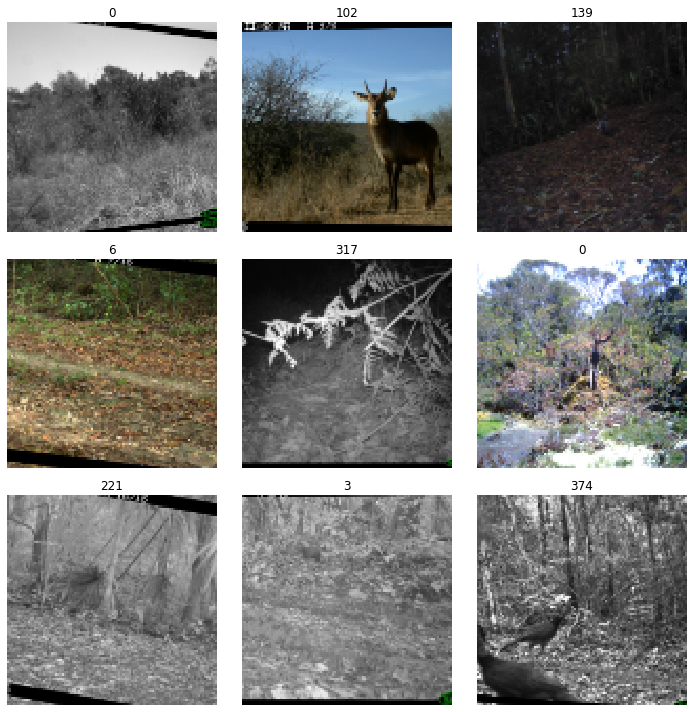

In [23]:
data.show_batch(rows=3, figsize=(10,10))

In [17]:
print(data.classes)
len(data.classes),data.c

[0, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 20, 24, 25, 26, 32, 44, 50, 62, 67, 70, 71, 72, 73, 74, 77, 78, 79, 80, 83, 86, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 108, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 127, 129, 130, 133, 134, 137, 139, 141, 142, 144, 145, 147, 150, 152, 153, 154, 156, 159, 161, 162, 163, 166, 167, 170, 175, 177, 198, 221, 227, 229, 230, 233, 234, 235, 240, 242, 243, 245, 250, 251, 252, 253, 256, 258, 259, 262, 265, 267, 268, 273, 286, 290, 291, 292, 294, 296, 299, 300, 301, 302, 306, 307, 309, 310, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 330, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 344, 345, 346, 347, 348, 349, 350, 352, 353, 354, 355, 356, 357, 370, 371, 372, 374, 375, 376, 377, 378, 379, 380, 382, 384, 385, 389, 390, 391, 402, 404, 405, 406, 407, 408, 409, 410, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 454, 558, 559, 561, 562, 563, 564, 565, 566, 

(215, 215)

In [26]:
#learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn = cnn_learner(data, models.resnet34, metrics=error_rate, ps=0.6)

In [27]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [28]:
learn.fit_one_cycle(3)

UnidentifiedImageError: Caught UnidentifiedImageError in DataLoader worker process 3.
Original Traceback (most recent call last):
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/fastai/data_block.py", line 651, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/fastai/vision/data.py", line 271, in get
    res = self.open(fn)
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/fastai/vision/data.py", line 267, in open
    return open_image(fn, convert_mode=self.convert_mode, after_open=self.after_open)
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/fastai/vision/image.py", line 398, in open_image
    x = PIL.Image.open(fn).convert(convert_mode)
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/PIL/Image.py", line 2862, in open
    "cannot identify image file %r" % (filename if filename else fp)
PIL.UnidentifiedImageError: cannot identify image file '/home/manoj/Documents/data/data/iwildcam-2020/train/8f17b296-21bc-11ea-a13a-137349068a90.jpg'


Training Loss is greater than validation loss. Something isn't right

In [22]:
import torch
torch.cuda.empty_cache()

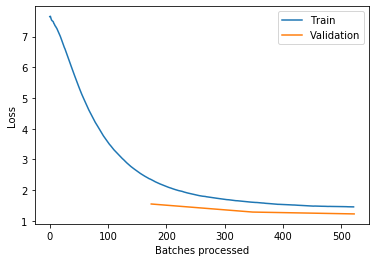

In [19]:
learn.recorder.plot_losses()

In [1]:
learn.save('stage-1.50.033010')

NameError: name 'learn' is not defined

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

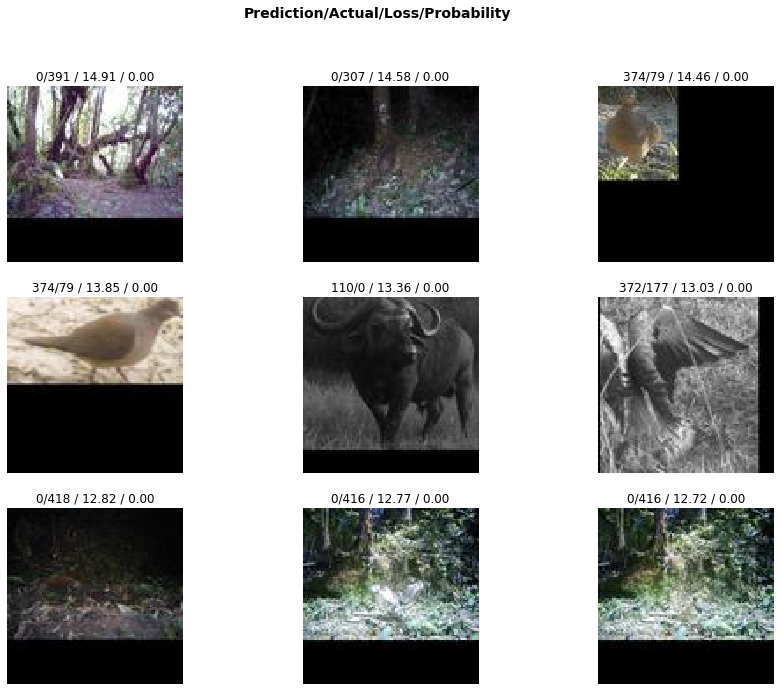

In [25]:
interp.plot_top_losses(9, figsize=(15,11))

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

KeyboardInterrupt: 

In [76]:
interp.most_confused(min_val=2)

[(374, 372, 442),
 (79, 0, 263),
 (372, 374, 244),
 (24, 10, 178),
 (376, 10, 176),
 (374, 3, 175),
 (6, 10, 172),
 (558, 372, 165),
 (115, 0, 158),
 (372, 3, 147),
 (371, 10, 142),
 (371, 3, 133),
 (371, 372, 130),
 (0, 372, 122),
 (90, 96, 122),
 (380, 3, 122),
 (10, 375, 119),
 (3, 372, 118),
 (243, 10, 118),
 (375, 10, 115),
 (24, 372, 113),
 (71, 96, 111),
 (380, 372, 105),
 (115, 96, 103),
 (96, 0, 102),
 (144, 0, 94),
 (137, 0, 92),
 (3, 374, 91),
 (10, 24, 87),
 (6, 3, 82),
 (6, 372, 80),
 (2, 372, 73),
 (372, 558, 73),
 (380, 374, 73),
 (315, 317, 72),
 (91, 317, 70),
 (371, 375, 68),
 (26, 3, 66),
 (240, 372, 66),
 (290, 0, 65),
 (0, 10, 64),
 (96, 71, 60),
 (111, 0, 59),
 (103, 96, 58),
 (379, 3, 58),
 (0, 115, 57),
 (558, 3, 57),
 (8, 372, 55),
 (0, 3, 54),
 (371, 374, 54),
 (374, 558, 54),
 (6, 375, 53),
 (71, 0, 53),
 (79, 372, 53),
 (6, 374, 52),
 (96, 115, 52),
 (0, 96, 51),
 (10, 243, 51),
 (2, 3, 50),
 (240, 374, 50),
 (371, 243, 50),
 (379, 372, 50),
 (380, 10, 50),


In [23]:
learn.unfreeze()

Check the model after unfreezing

In [20]:
learn.fit_one_cycle(20)

The training losses are still greater than validation losses

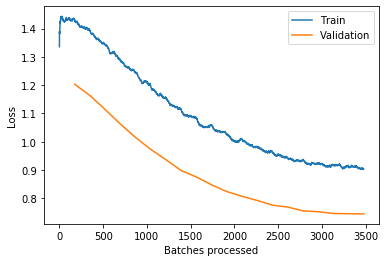

In [21]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(20)

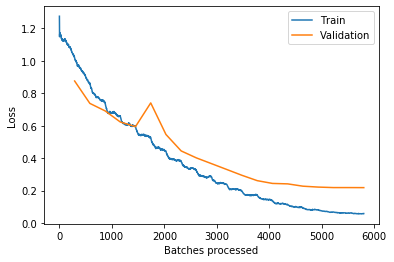

In [34]:
learn.recorder.plot_losses()

Much better! But can be better. Maybe the learning rate needs to be reduced!

In [29]:
learn.save('stage-1.50.033008');

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


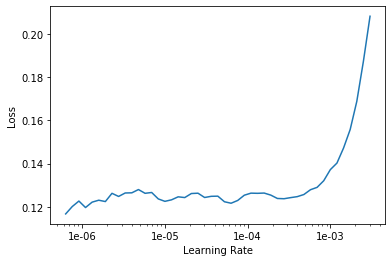

In [31]:
learn.recorder.plot()

In [41]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [42]:
learn.fit_one_cycle(2, max_lr=slice(7e-4,9e-3))

Unfreeze and rerun

In [44]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(7e-4,9e-3))

Training Loss is less than validation loss for one but ...

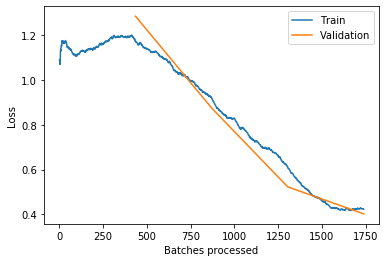

In [45]:
learn.recorder.plot_losses()

Maybe a few more fittings will make the losses better

In [46]:
learn.fit_one_cycle(4, max_lr=slice(7e-4,9e-3))

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f925a868208>>
Traceback (most recent call last):
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f925a868208>>
Traceback (most recent call last):
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch

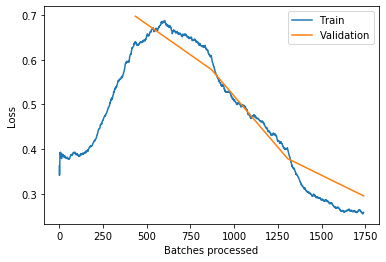

In [47]:
learn.recorder.plot_losses()

In [48]:
learn.fit_one_cycle(4, max_lr=slice(7e-4,9e-3))

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f925a868208>>
Traceback (most recent call last):
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f925a868208>>
Traceback (most recent call last):
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch

    self._shutdown_workers()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f925a868208>>
Traceback (most recent call last):
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 122, in j

    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f925a868208>>
Traceback (most recent call last):
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f9

Traceback (most recent call last):
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f925a868208>>
Traceback (most recent call last):
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/

    w.join()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f925a868208>>
Traceback (most recent call last):
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/home/manoj/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _

KeyboardInterrupt: 

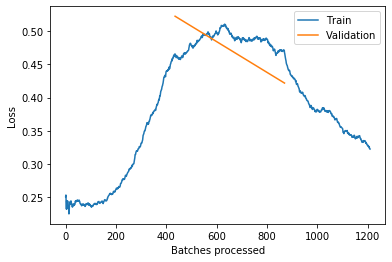

In [49]:
learn.recorder.plot_losses()

In [29]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-3))
learn.save('stage-1.0401')

In [30]:
learn.save('stage-1.0401')

In [110]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

In [111]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

In [45]:
learn.save('stage-1.103');

In [115]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

In [142]:
learn.save('stage-1.2')

In [119]:
learn.load('stage-1.2')

Learner(data=ImageDataBunch;

Train: LabelList (174368 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
canis lupus,canis lupus,canis lupus,canis lupus,canis lupus
Path: /home/manoj/Documents/data/data/iwildcam-2020/train/28X28;

Valid: LabelList (43585 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
didelphis sp,empty,tayassu pecari,start,urocyon cinereoargenteus
Path: /home/manoj/Documents/data/data/iwildcam-2020/train/28X28;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (con

In [123]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

In [138]:
learn.save('stage-1.2')

In [126]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

In [228]:
learn.save('stage-1.2')

In [84]:
interp = ClassificationInterpretation.from_learner(learn)

In [85]:
interp.most_confused(min_val=2)

[(79, 0, 148),
 (90, 96, 101),
 (290, 0, 47),
 (103, 96, 42),
 (144, 0, 41),
 (115, 0, 36),
 (0, 115, 32),
 (372, 374, 32),
 (137, 0, 30),
 (24, 10, 29),
 (96, 0, 28),
 (96, 90, 25),
 (318, 91, 24),
 (374, 372, 23),
 (0, 111, 22),
 (111, 0, 22),
 (96, 111, 21),
 (0, 79, 19),
 (0, 137, 18),
 (10, 243, 17),
 (0, 310, 16),
 (72, 70, 16),
 (111, 96, 16),
 (315, 317, 16),
 (96, 115, 15),
 (259, 111, 15),
 (371, 10, 15),
 (6, 10, 14),
 (71, 96, 14),
 (375, 243, 14),
 (10, 371, 13),
 (91, 318, 13),
 (115, 96, 13),
 (375, 10, 13),
 (74, 115, 12),
 (291, 0, 12),
 (309, 0, 12),
 (6, 24, 11),
 (6, 375, 10),
 (70, 72, 10),
 (90, 0, 10),
 (111, 112, 10),
 (256, 71, 10),
 (258, 0, 10),
 (0, 112, 9),
 (2, 8, 9),
 (10, 375, 9),
 (24, 372, 9),
 (71, 90, 9),
 (112, 0, 9),
 (317, 315, 9),
 (348, 0, 9),
 (371, 24, 9),
 (0, 90, 8),
 (0, 110, 8),
 (6, 0, 8),
 (6, 371, 8),
 (70, 86, 8),
 (96, 71, 8),
 (258, 96, 8),
 (371, 3, 8),
 (371, 243, 8),
 (371, 372, 8),
 (378, 380, 8),
 (0, 96, 7),
 (0, 144, 7),
 (0, 

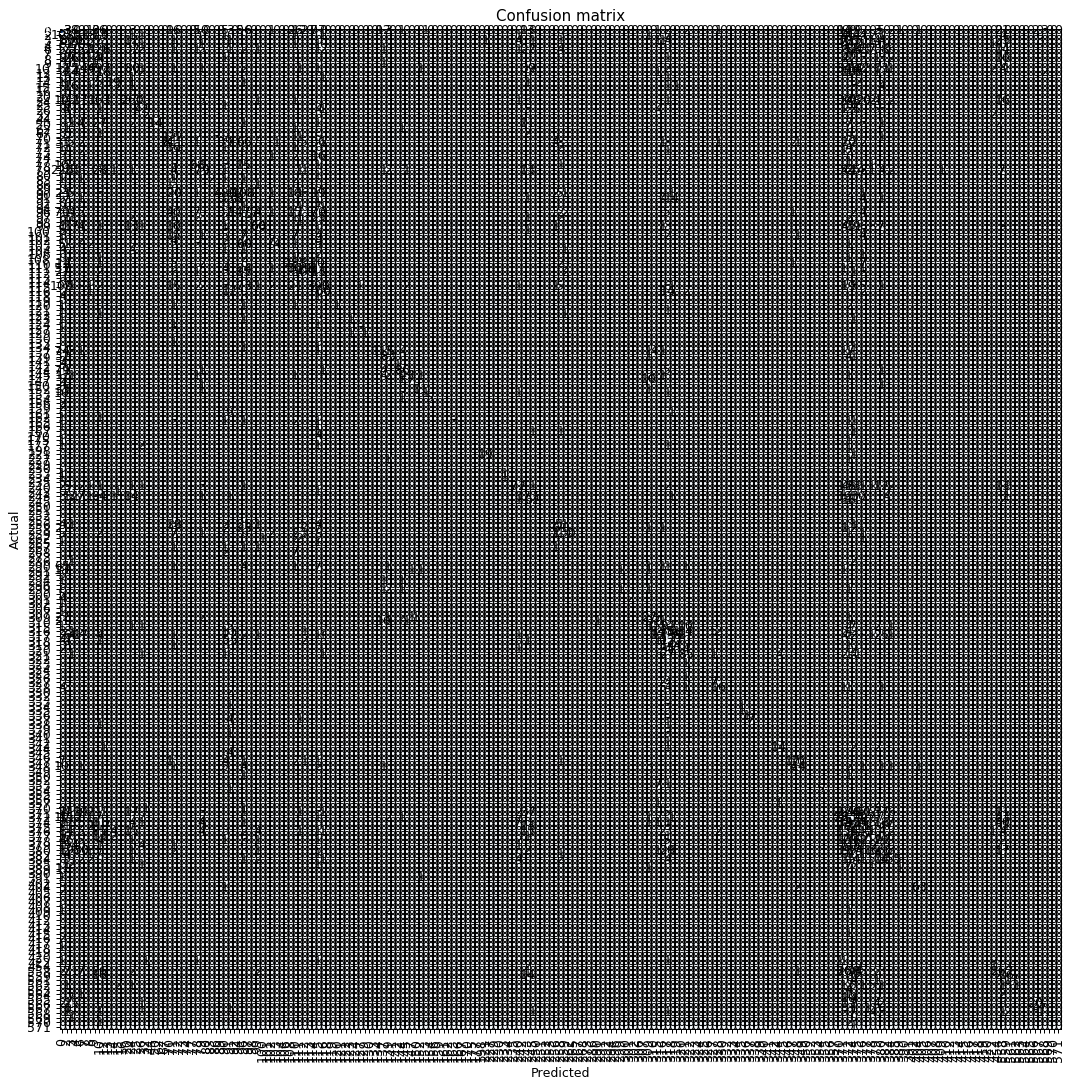

In [32]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=90)

In [134]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

In [141]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

In [33]:
jsonTestFilePath='/home/manoj/Documents/data/data/iwildcam-2020/iwildcam2020_test_information.json'
testData = readJSONFile(jsonTestFilePath)

testImages=testData["images"]
testCategories = testData["categories"]
testInfo = testData["info"]

# Convert to Data frame

testImages = pd.DataFrame.from_dict(testImages)
testCategories = pd.DataFrame.from_dict(testCategories)

#Remove data from memory
del testData, testInfo

# Remove Unnecessary fields from images
testDf1 = pd.DataFrame(testImages.file_name)
    

In [34]:
testImages

seq_num_frames  location                 datetime  \
0                   1        84  2013-08-02 21:44:00.000   
1                   1        84  2013-08-02 21:51:00.000   
2                   1       548  2013-04-25 18:23:00.000   
3                   1       181  2013-04-17 16:10:00.000   
4                   1       181  2013-04-20 03:11:00.000   
...               ...       ...                      ...   
62889              -1         5  2013-08-01 18:45:20.000   
62890              -1         5  2013-08-01 18:45:21.000   
62891              -1         5  2013-08-01 18:45:22.000   
62892              -1         5  2013-08-01 18:45:22.000   
62893              -1         5  2013-08-01 18:45:23.000   

                                         id  frame_num  \
0      88037cce-21bc-11ea-a13a-137349068a90          1   
1      963e6b46-21bc-11ea-a13a-137349068a90          1   
2      8a1b53ba-21bc-11ea-a13a-137349068a90          1   
3      938c0d5e-21bc-11ea-a13a-137349068a90          1   
4      95b9bd92-21bc-11ea-a13a-137349068a90          1   
...                                     ...        ...   
62889  978d4224-21bc-11ea-a13a-137349068a90         -1   
62890  8bd8cad4-21bc-11ea-a13a-137349068a90         -1   
62891  8c894fc6-21bc-11ea-a13a-137349068a90         -1   
62892  97bffbf6-21bc-11ea-a13a-137349068a90         -1   
62893  91d4fb7e-21bc-11ea-a13a-137349068a90         -1   

                                     seq_id  width  height  \
0      88037e90-21bc-11ea-a13a-137349068a90   2771    1779   
1      963e6cb8-21bc-11ea-a13a-137349068a90   2771    1779   
2      8a1b5554-21bc-11ea-a13a-137349068a90   2895    1865   
3      938c0f02-21bc-11ea-a13a-137349068a90   2902    1818   
4      95b9be96-21bc-11ea-a13a-137349068a90   2212    1841   
...                                     ...    ...     ...   
62889  995a6da2-21bc-11ea-a13a-137349068a90   1280    1024   
62890  995a6da2-21bc-11ea-a13a-137349068a90   1280    1024   
62891  995a6da2-21bc-11ea-a13a-137349068a90   1280    1024   
62892  995a6da2-21bc-11ea-a13a-137349068a90   1280    1024   
62893  995a6da2-21bc-11ea-a13a-137349068a90   1280    1024   

                                      file_name  
0      88037cce-21bc-11ea-a13a-137349068a90.jpg  
1      963e6b46-21bc-11ea-a13a-137349068a90.jpg  
2      8a1b53ba-21bc-11ea-a13a-137349068a90.jpg  
3      938c0d5e-21bc-11ea-a13a-137349068a90.jpg  
4      95b9bd92-21bc-11ea-a13a-137349068a90.jpg  
...                                         ...  
62889  978d4224-21bc-11ea-a13a-137349068a90.jpg  
62890  8bd8cad4-21bc-11ea-a13a-137349068a90.jpg  
62891  8c894fc6-21bc-11ea-a13a-137349068a90.jpg  
62892  97bffbf6-21bc-11ea-a13a-137349068a90.jpg  
62893  91d4fb7e-21bc-11ea-a13a-137349068a90.jpg  

[62894 rows x 9 columns]

In [35]:
testPath=Path("/home/manoj/Documents/data/data/iwildcam-2020/test/100X100")

In [36]:
testPath.ls()[10]

PosixPath('/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/86769580-21bc-11ea-a13a-137349068a90.jpg')

In [37]:
for i, file in enumerate(testPath.ls()):
    if (i < 10) :
        print(file)

/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/867611a0-21bc-11ea-a13a-137349068a90.jpg
/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/86761d58-21bc-11ea-a13a-137349068a90.jpg
/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/867624e2-21bc-11ea-a13a-137349068a90.jpg
/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/86762942-21bc-11ea-a13a-137349068a90.jpg
/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/86763c0c-21bc-11ea-a13a-137349068a90.jpg
/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/86765afc-21bc-11ea-a13a-137349068a90.jpg
/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/867665c4-21bc-11ea-a13a-137349068a90.jpg
/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/86767820-21bc-11ea-a13a-137349068a90.jpg
/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/86768504-21bc-11ea-a13a-137349068a90.jpg
/home/manoj/Documents/data/data/iwildcam-2020/test/100X100/8676929c-21bc-11ea-a13a-137349068a90.jpg


In [38]:
learn.predict(open_image(testPath.ls()[1]), True)[1]

Category 96

In [39]:
for i, file in enumerate(testPath.ls()):
    if (i < 10) :
        print(learn.predict(open_image(testPath.ls()[i]))[0])

0
96
374
115
371
372
111
378
71
115


In [40]:
i=0
for file in testPath.ls():
    if (i < 10) :
        print(learn.predict(open_image(file))[0])
        i=i+1

0
96
374
115
371
372
111
378
71
115


In [41]:
#df=[ {"file_name":str(file).replace(str(testPath)+'/',''), "name": learn.predict(open_image(file))[0] }
df=[ {"file_name":str(file).replace(str(testPath)+'/',''), "Id": learn.predict(open_image(file))[0] }
    for file in testPath.ls()[:]
]

In [42]:
df=pd.DataFrame(df)

In [48]:
df

file_name   Id
0      867611a0-21bc-11ea-a13a-137349068a90.jpg    0
1      86761d58-21bc-11ea-a13a-137349068a90.jpg   96
2      867624e2-21bc-11ea-a13a-137349068a90.jpg  374
3      86762942-21bc-11ea-a13a-137349068a90.jpg  115
4      86763c0c-21bc-11ea-a13a-137349068a90.jpg  371
...                                         ...  ...
62890  995a286a-21bc-11ea-a13a-137349068a90.jpg   79
62891  995a3fda-21bc-11ea-a13a-137349068a90.jpg    0
62892  995a4dfe-21bc-11ea-a13a-137349068a90.jpg   10
62893  995a548e-21bc-11ea-a13a-137349068a90.jpg  372
62894  995a6208-21bc-11ea-a13a-137349068a90.jpg    0

[62895 rows x 2 columns]

In [49]:
jsonSubmissionFilePath='/home/manoj/Documents/data/data/iwildcam-2020/sample_submission.csv'
submission=pd.read_csv(jsonSubmissionFilePath)

In [50]:
submission.drop(columns=["Category"], inplace=True)
submission

Id
0      873ff218-21bc-11ea-a13a-137349068a90
1      884103be-21bc-11ea-a13a-137349068a90
2      973feb64-21bc-11ea-a13a-137349068a90
3      8ebf4e44-21bc-11ea-a13a-137349068a90
4      95a33464-21bc-11ea-a13a-137349068a90
...                                     ...
62865  976c0b90-21bc-11ea-a13a-137349068a90
62866  92f567fa-21bc-11ea-a13a-137349068a90
62867  9692fb2a-21bc-11ea-a13a-137349068a90
62868  8b0412f8-21bc-11ea-a13a-137349068a90
62869  8d37bc78-21bc-11ea-a13a-137349068a90

[62870 rows x 1 columns]

In [51]:
testXref=testImages[["file_name","id"]]

In [52]:
len(testXref)

62894

In [53]:
#testXref.groupby('file_name').first()
df.merge(testXref, on='file_name')

file_name   Id  \
0      867611a0-21bc-11ea-a13a-137349068a90.jpg    0   
1      86761d58-21bc-11ea-a13a-137349068a90.jpg   96   
2      867624e2-21bc-11ea-a13a-137349068a90.jpg  374   
3      86762942-21bc-11ea-a13a-137349068a90.jpg  115   
4      86763c0c-21bc-11ea-a13a-137349068a90.jpg  371   
...                                         ...  ...   
62889  995a286a-21bc-11ea-a13a-137349068a90.jpg   79   
62890  995a3fda-21bc-11ea-a13a-137349068a90.jpg    0   
62891  995a4dfe-21bc-11ea-a13a-137349068a90.jpg   10   
62892  995a548e-21bc-11ea-a13a-137349068a90.jpg  372   
62893  995a6208-21bc-11ea-a13a-137349068a90.jpg    0   

                                         id  
0      867611a0-21bc-11ea-a13a-137349068a90  
1      86761d58-21bc-11ea-a13a-137349068a90  
2      867624e2-21bc-11ea-a13a-137349068a90  
3      86762942-21bc-11ea-a13a-137349068a90  
4      86763c0c-21bc-11ea-a13a-137349068a90  
...                                     ...  
62889  995a286a-21bc-11ea-a13a-137349068a90  
62890  995a3fda-21bc-11ea-a13a-137349068a90  
62891  995a4dfe-21bc-11ea-a13a-137349068a90  
62892  995a548e-21bc-11ea-a13a-137349068a90  
62893  995a6208-21bc-11ea-a13a-137349068a90  

[62894 rows x 3 columns]

In [54]:
#df1=df.merge(testImages, on='file_name')[["id","name"]]
df1=df.merge(testXref, on='file_name')[["id","Id"]]
#df1=df1.rename(columns={"id":"Id"})
df1=df1.rename(columns={"Id":"Category", "id":"Id"})

In [55]:
df1

Id Category
0      867611a0-21bc-11ea-a13a-137349068a90        0
1      86761d58-21bc-11ea-a13a-137349068a90       96
2      867624e2-21bc-11ea-a13a-137349068a90      374
3      86762942-21bc-11ea-a13a-137349068a90      115
4      86763c0c-21bc-11ea-a13a-137349068a90      371
...                                     ...      ...
62889  995a286a-21bc-11ea-a13a-137349068a90       79
62890  995a3fda-21bc-11ea-a13a-137349068a90        0
62891  995a4dfe-21bc-11ea-a13a-137349068a90       10
62892  995a548e-21bc-11ea-a13a-137349068a90      372
62893  995a6208-21bc-11ea-a13a-137349068a90        0

[62894 rows x 2 columns]

In [56]:
#df2=submission.merge(df1, on="Id")[["Id","Category"]]
df2=submission.merge(df1, on="Id")

In [57]:
df2

Id Category
0      873ff218-21bc-11ea-a13a-137349068a90        0
1      884103be-21bc-11ea-a13a-137349068a90       96
2      973feb64-21bc-11ea-a13a-137349068a90        3
3      8ebf4e44-21bc-11ea-a13a-137349068a90       24
4      95a33464-21bc-11ea-a13a-137349068a90       24
...                                     ...      ...
62865  976c0b90-21bc-11ea-a13a-137349068a90        3
62866  92f567fa-21bc-11ea-a13a-137349068a90       10
62867  9692fb2a-21bc-11ea-a13a-137349068a90        0
62868  8b0412f8-21bc-11ea-a13a-137349068a90        0
62869  8d37bc78-21bc-11ea-a13a-137349068a90       50

[62870 rows x 2 columns]

In [58]:
#df["file_name"]

In [59]:
df2.to_csv("submission.2020033008.csv", index=False)

In [ ]:
preds, y, losses = learn.get_preds(ds_type=DatasetType.Test, with_loss=True)
#y = torch.argmax(preds, dim=1)

In [47]:
!pwd

/home/manoj/Documents/GitHub/IWildCam2020/src


In [ ]:
learn1 = cnn_learner(data, models.resnet34, metrics=error_rate)